# Datasets

Scikit-Learn 에서 모델을 테스트 하기 위한 예제 데이터를 로드 하거나 생성하는 모듈

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets



In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


## Loader

주요 내장 데이터 셋
* datasets.load_boston(): 미국 보스턴 주택 가격 데이터 (회귀용)
* datasets.load_diabetes(): 당뇨 데이터 (회귀용)
* datasets.load_breast_cancer(): 유방암 데이터 (분류용) 
* datasets.load_digits(): 0~9 숫자 이미지 데이터 (분류용)
* datasets.load_iris(): 붓꽃 데이터 (분류용)

온라인 데이터 셋 로드
* datasets.fetch_california_housing(): 미국 캘리포니아 주택 가격 데이터 (회귀용)
* datasets.fetch_covtype(): 토지조사 데이터 (회귀용)
* datasets.fetch_20newsgroups(): 20개 뉴스그룹 데이터 (분류용)
* datasets.fetch_olivetti_faces(): 얼굴 이미지 데이터 (분류용)
* datasets.fetch_lfw_people(): 얼굴 이미지 데이터 (분류용)
* datasets.fetch_lfw_pairs(): 얼굴 이미지 데이터 (분류용)
* datasets.fetch_openml(): https://openml.org/ 공개된 데이터 셋을 이름 / ID로 다운로드


In [2]:
from sklearn import datasets

# 상세한 설명은 함수뒤에 ? 를 이용해 확인
datasets.load_boston?

Signature: datasets.load_boston(*, return_X_y=False)
Docstring:
Load and return the boston house-prices dataset (regression).

==============   ==============
Samples total               506
Dimensionality               13
Features         real, positive
Targets           real 5. - 50.
==============   ==============

Read more in the :ref:`User Guide <boston_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

Returns
-------
data : :class:`~sklearn.utils.Bunch`
    Dictionary-like object, with the following attributes.

    data : ndarray of shape (506, 13)
        The data matrix.
    target : ndarray of shape (506, )
        The regression target.
    filename : str
        The physical location of boston csv dataset.

        .. versionadded:: 0.20

    DESCR : str
        The full description of the 

In [3]:
# 이미지 데이터 셋인 MNIST 데이터 다운로드 예
# 웹 사이트를 통해서 검색한 후 이름 또는 URL 뒤에 data_id를 통해 다운로드 가능
# https://www.openml.org/d/41063

mnist = datasets.fetch_openml(data_id="41063", cache=True)

In [4]:
print(f"mnist.details: {mnist.details}") 
print(f"mnist.data.shape: {mnist.data.shape}, mnist.target.shape: {mnist.target.shape}")

mnist.details: {'id': '41063', 'name': 'MNIST', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'upload_date': '2018-03-22T21:16:35', 'licence': 'CC0', 'url': 'https://www.openml.org/data/v1/download/18689782/MNIST.arff', 'file_id': '18689782', 'default_target_attribute': 'class', 'visibility': 'public', 'original_data_url': 'http://yann.lecun.com/exdb/mnist/', 'status': 'in_preparation', 'processing_date': '2018-10-04 07:23:06', 'md5_checksum': 'd9de0671d8e0c359373425bd83a5e754'}
mnist.data.shape: (62000, 784), mnist.target.shape: (62000,)


## Generator

https://scikit-learn.org/stable/datasets/sample_generators.html

### Regression 용 데이터 생성기

data shape: xs=(1000, 1), ys=(1000,)


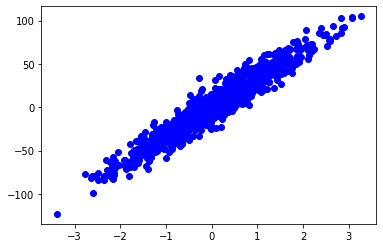

In [5]:
n_samples = 1000
xs, ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise= 10.0, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=rseed) # 난수 발생용 Seed 값
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
plt.scatter(xs, ys, label='train', c='b')
plt.show()

### Classification용 데이터 생성기

In [6]:
n_samples = 10000
xs, ys = datasets.make_classification(
    n_samples=n_samples, # 데이터 수
    n_features=10, # X feature 수
    n_informative=3,
    n_classes=3, # Y class 수
    random_state=rseed) # 난수 발생용 Seed 값
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
for x, y in list(zip(xs, ys))[:3]:
     print(f"x:{x}, y:{y}")

data shape: xs=(10000, 10), ys=(10000,)
x:[0.987 0.152 -0.469 1.428 2.019 1.503 -2.083 -0.623 1.910 -1.155], y:2
x:[0.223 0.537 0.681 0.004 -0.064 -0.020 -2.345 -0.362 2.666 -1.555], y:2
x:[-2.090 0.951 -1.616 0.383 1.154 2.584 1.686 -0.835 -0.706 -1.318], y:1


### Clustering용 데이터 생성기

data shape: xs=(1000, 2), ys=(1000,)


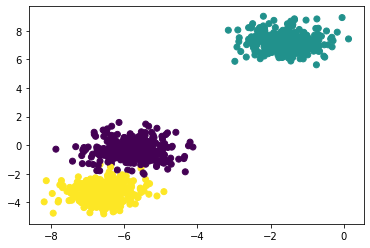

In [7]:
n_samples = 1000
xs, ys = datasets.make_blobs( # 구 모양 클러스터
    n_samples=n_samples, # 데이터 수
    centers=3, # 클러스터 수
    cluster_std=0.60, # 클러스터 std 값 (클러스터의 퍼짐 정도)
    random_state=rseed)
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
plt.scatter(xs[:, 0], xs[:, 1], c=ys)

data shape: xs=(1000, 2), ys=(1000,)


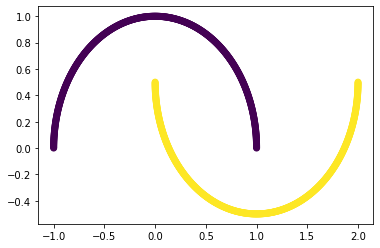

In [8]:
xs, ys = datasets.make_moons( # 달 모양 클러스터
    n_samples=n_samples, # 데이터 수
    random_state=rseed)
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
plt.scatter(xs[:, 0], xs[:, 1], c=ys)

data shape: xs=(1000, 2), ys=(1000,)


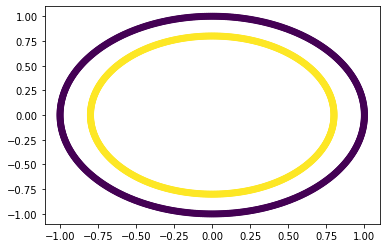

In [9]:
xs, ys = datasets.make_circles( 
    n_samples=n_samples, # 데이터 수
    random_state=rseed)
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
plt.scatter(xs[:, 0], xs[:, 1], c=ys)
